In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("brazil_covid19.csv")
data.tail()

,date,hour,state,suspects,refuses,cases,deaths,Unnamed: 7
756,2020-03-20,NaN,Roraima,16,12,0,0,NaN
757,2020-03-20,NaN,Santa Catarina,361,0,40,0,NaN
758,2020-03-20,NaN,São Paulo,9023,775,345,9,NaN
759,2020-03-20,NaN,Sergipe,25,41,7,0,NaN
760,2020-03-20,NaN,Tocantins,67,16,1,0,NaN


In [3]:
data["suspects"][0]

'1'

In [7]:
sp = pd.DataFrame(columns=["suspects", "refuses", "cases", "deaths"])#, index=data["date"])
last_date = None
for i in range(760):
    if data["state"][i] == "São Paulo":
        actual_date = data["date"][i]
        if actual_date == last_date:
            pass
        d = {'date': [data["date"][i]], 'suspects': [data["suspects"][i]], 'refuses': [data["refuses"][i]], 'cases': [data["cases"][i]], 'deaths':[data["deaths"][i]]}
        aux = pd.DataFrame(data=d)
        sp = sp.append(aux)
        last_date = actual_date

sp = sp.set_index("date")

# drop consecutives loop
# print(sp.index.size)
# j = 0
# for i in range(sp.index.size - 1):
#     if sp.index[i] == sp.index[i+1]:
#         sp = sp.drop([sp.index[i]], axis=0)
#         print("Consecutive!")
#         i += 1
#         j += 1
#     if i >= sp.index.size - j:
#         break

print(sp.index.size)
sp.head()


52


,suspects,refuses,cases,deaths
date,,,,
2020-01-30,3,1,0,0
2020-01-31,7,2,0,0
2020-02-01,8,2,0,0
2020-02-02,8,2,0,0
2020-02-03,7,3,0,0


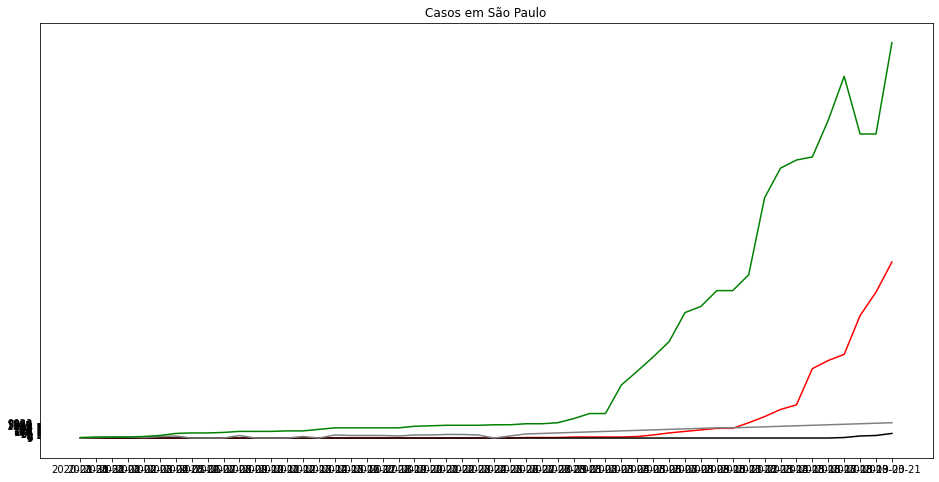

In [27]:
plt.figure(1, (16, 8))
plt.title("Casos em São Paulo")
plt.plot(sp.index, sp["cases"], color="red")
plt.plot(sp.index, sp["deaths"], color="black")
plt.plot(sp.index, sp["suspects"], color="grey")
plt.plot(sp.index, sp["refuses"], color="green")

In [28]:
# Assuming:

mortality_rate = 0.01 #1% mortality rate
double_time = 7 # 7 days to double number of infecteds
days_until_death = 20 # 20 days from contamination to death

In [29]:
import datetime

In [46]:
print(sp.index)

Index(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21'],
      dtype='object')


In [57]:
v =  []
date = datetime.datetime(2020, 1, 30)
for i in range(sp.index.size + 20):
    date_str = date.strftime(format="%Y-%m-%d")
    v.append(date_str)
    date += datetime.timedelta(days=1)
ind = pd.Index(v)

In [72]:
estimation = pd.Series(dtype='int64', index=ind)
estimation.tail()
estimation_2 = pd.Series(dtype='int64', index=ind)
estimation.tail()

2020-04-06    0
2020-04-07    0
2020-04-08    0
2020-04-09    0
2020-04-10    0
dtype: int64

In [73]:
print(sp.index.size)
date = datetime.datetime(2020, 1, 31)
date_str = date.strftime(format="%Y-%m-%d")
# estimation = pd.Series(dtype='int64', index=sp.index)
#estimation = estimation.loc[estimation.shift() != estimation]
for i in range(sp.index.size - days_until_death -1):
    date_str = date.strftime(format="%Y-%m-%d")
    future_date = date + datetime.timedelta(days=days_until_death)
    future_date_str = future_date.strftime(format="%Y-%m-%d")
    print(future_date_str)
    previous_date_str = (date - datetime.timedelta(days=1)).strftime(format="%Y-%m-%d")
    estimation[date_str] = estimation[previous_date_str] + (1/mortality_rate) * sp["deaths"][future_date_str]
    date += datetime.timedelta(days=1)
estimation.tail()

52
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21


2020-04-06    0
2020-04-07    0
2020-04-08    0
2020-04-09    0
2020-04-10    0
dtype: int64

## Modeling exponential growth
### The estimated cases by death statistics double with time, exponentially
$p = p0*e^{\tau.t}$ => $2*p = p*e^{\tau.td}$


$e^{\tau.td}$ = 2

$\tau = ln(2)/td$

In [74]:
date = datetime.datetime(2020, 1, 31)
tau = np.log(2)/double_time

for i in range(sp.index.size):
    date_str = date.strftime(format="%Y-%m-%d")
    for j in range(sp.index.size-i):
        
        future_date = date + datetime.timedelta(days=1)
        print(future_date_str)
        future_date_str = future_date.strftime(format="%Y-%m-%d")
        print(estimation[date_str])
        print(tau*j)
        estimation_2[future_date_str] += np.floor(estimation[date_str]*np.exp(tau*j))
    date += datetime.timedelta(days=1)
estimation.tail()

2020-03-21
0
0.0
2020-02-01
0
0.09902102579427789
2020-02-01
0
0.19804205158855578
2020-02-01
0
0.29706307738283366
2020-02-01
0
0.39608410317711157
2020-02-01
0
0.4951051289713895
2020-02-01
0
0.5941261547656673
2020-02-01
0
0.6931471805599453
2020-02-01
0
0.7921682063542231
2020-02-01
0
0.891189232148501
2020-02-01
0
0.990210257942779
2020-02-01
0
1.0892312837370568
2020-02-01
0
1.1882523095313346
2020-02-01
0
1.2872733353256125
2020-02-01
0
1.3862943611198906
2020-02-01
0
1.4853153869141684
2020-02-01
0
1.5843364127084463
2020-02-01
0
1.6833574385027241
2020-02-01
0
1.782378464297002
2020-02-01
0
1.88139949009128
2020-02-01
0
1.980420515885558
2020-02-01
0
2.0794415416798357
2020-02-01
0
2.1784625674741136
2020-02-01
0
2.2774835932683914
2020-02-01
0
2.3765046190626693
2020-02-01
0
2.475525644856947
2020-02-01
0
2.574546670651225
2020-02-01
0
2.6735676964455033
2020-02-01
0
2.772588722239781
2020-02-01
0
2.871609748034059
2020-02-01
0
2.970630773828337
2020-02-01
0
3.069651799622614

0
0.0
2020-02-14
0
0.09902102579427789
2020-02-14
0
0.19804205158855578
2020-02-14
0
0.29706307738283366
2020-02-14
0
0.39608410317711157
2020-02-14
0
0.4951051289713895
2020-02-14
0
0.5941261547656673
2020-02-14
0
0.6931471805599453
2020-02-14
0
0.7921682063542231
2020-02-14
0
0.891189232148501
2020-02-14
0
0.990210257942779
2020-02-14
0
1.0892312837370568
2020-02-14
0
1.1882523095313346
2020-02-14
0
1.2872733353256125
2020-02-14
0
1.3862943611198906
2020-02-14
0
1.4853153869141684
2020-02-14
0
1.5843364127084463
2020-02-14
0
1.6833574385027241
2020-02-14
0
1.782378464297002
2020-02-14
0
1.88139949009128
2020-02-14
0
1.980420515885558
2020-02-14
0
2.0794415416798357
2020-02-14
0
2.1784625674741136
2020-02-14
0
2.2774835932683914
2020-02-14
0
2.3765046190626693
2020-02-14
0
2.475525644856947
2020-02-14
0
2.574546670651225
2020-02-14
0
2.6735676964455033
2020-02-14
0
2.772588722239781
2020-02-14
0
2.871609748034059
2020-02-14
0
2.970630773828337
2020-02-14
0
3.0696517996226147
2020-02-1

2020-03-04
0
0.39608410317711157
2020-03-04
0
0.4951051289713895
2020-03-04
0
0.5941261547656673
2020-03-04
0
0.6931471805599453
2020-03-04
0
0.7921682063542231
2020-03-04
0
0.891189232148501
2020-03-04
0
0.990210257942779
2020-03-04
0
1.0892312837370568
2020-03-04
0
1.1882523095313346
2020-03-04
0
1.2872733353256125
2020-03-04
0
1.3862943611198906
2020-03-04
0
1.4853153869141684
2020-03-04
0
1.5843364127084463
2020-03-04
0
1.6833574385027241
2020-03-04
0
1.782378464297002
2020-03-04
0
1.88139949009128
2020-03-04
0
0.0
2020-03-05
0
0.09902102579427789
2020-03-05
0
0.19804205158855578
2020-03-05
0
0.29706307738283366
2020-03-05
0
0.39608410317711157
2020-03-05
0
0.4951051289713895
2020-03-05
0
0.5941261547656673
2020-03-05
0
0.6931471805599453
2020-03-05
0
0.7921682063542231
2020-03-05
0
0.891189232148501
2020-03-05
0
0.990210257942779
2020-03-05
0
1.0892312837370568
2020-03-05
0
1.1882523095313346
2020-03-05
0
1.2872733353256125
2020-03-05
0
1.3862943611198906
2020-03-05
0
1.4853153869

2020-04-06    0
2020-04-07    0
2020-04-08    0
2020-04-09    0
2020-04-10    0
dtype: int64

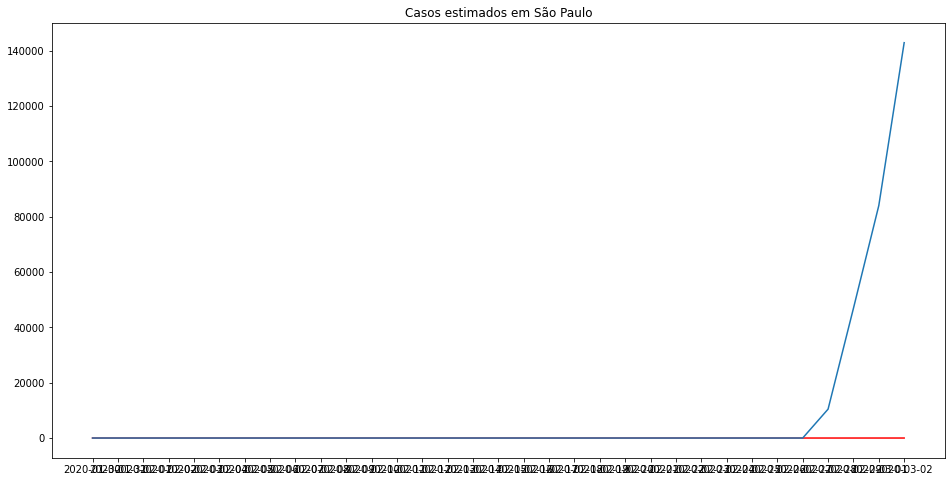

In [90]:
plt.figure(1, (16, 8))
plt.title("Casos estimados em São Paulo")
n=33
plt.plot(sp.index[:n], sp["cases"][:n], color="red")
plt.plot(estimation_2.index[:n], estimation_2[:n])

In [89]:
print("{} cases in {}".format(estimation_2[32], estimation_2.index[32]))

142965 cases in 2020-03-02
